In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [7]:
source_path = 'PetImages/'

In [8]:
# grader-required-cell

# Define root directory
root_dir = 'cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """
  ### START CODE HERE
  os.makedirs(f'{root_dir}/validation/cats', exist_ok=True)
  os.makedirs(f'{root_dir}/validation/dogs', exist_ok=True)
  os.makedirs(f'{root_dir}/training/cats', exist_ok=True)
  os.makedirs(f'{root_dir}/training/dogs', exist_ok=True)
  ### END CODE HERE


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [9]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

cats-v-dogs\training
cats-v-dogs\validation
cats-v-dogs\training\cats
cats-v-dogs\training\dogs
cats-v-dogs\validation\cats
cats-v-dogs\validation\dogs


In [10]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """  
  z=os.listdir(SOURCE_DIR)
  
  for i in z:
    try:
      tf.keras.preprocessing.image.load_img(SOURCE_DIR+i)
    except:
      z.remove(i)
      print(f'{i} is zero length, so ignoring.')
      
  valsize=round(len(os.listdir(SOURCE_DIR))*(1-SPLIT_SIZE)) 
  for i in range(valsize):
      temp=random.choice(z); z.remove(temp)      
      copyfile(SOURCE_DIR+temp, VALIDATION_DIR+temp) 
    
  for i in z: copyfile(SOURCE_DIR+i, TRAINING_DIR+i)

In [11]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "PetImages/Cat/"
DOG_SOURCE_DIR = "PetImages/Dog/"

TRAINING_DIR = "cats-v-dogs/training/"
VALIDATION_DIR = "cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))




Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [16]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.05,
                                     height_shift_range=0.01,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=False,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode="binary",
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [17]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [18]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150, 3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(16, "relu"),
    keras.layers.Dense(8, "relu"),
    
    keras.layers.Dense(1, "sigmoid"),
  ])


  model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [23]:
class thecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(thecallback, self).__init__()
        
    def on_epoch_end(self, epoch, logs=None):
        logtrain, logval = logs["accuracy"], logs["val_accuracy"]
        if logtrain > 0.8 and logval> 0.8:
            self.model.stop_training = True

In [24]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator, callbacks=[thecallback()])

Epoch 1/15
704/704 [==============================] - 145s 205ms/step - loss: 0.6755 - accuracy: 0.5663 - val_loss: 0.6343 - val_accuracy: 0.6324
Epoch 2/15
704/704 [==============================] - 144s 204ms/step - loss: 0.5910 - accuracy: 0.6881 - val_loss: 0.5332 - val_accuracy: 0.7308
Epoch 3/15
704/704 [==============================] - 143s 202ms/step - loss: 0.5229 - accuracy: 0.7418 - val_loss: 0.5128 - val_accuracy: 0.7436
Epoch 4/15
704/704 [==============================] - 144s 204ms/step - loss: 0.4792 - accuracy: 0.7712 - val_loss: 0.4425 - val_accuracy: 0.7920
Epoch 5/15
704/704 [==============================] - 145s 207ms/step - loss: 0.4414 - accuracy: 0.7940 - val_loss: 0.4293 - val_accuracy: 0.8096
Epoch 6/15
704/704 [==============================] - 146s 207ms/step - loss: 0.4222 - accuracy: 0.8070 - val_loss: 0.4263 - val_accuracy: 0.8020


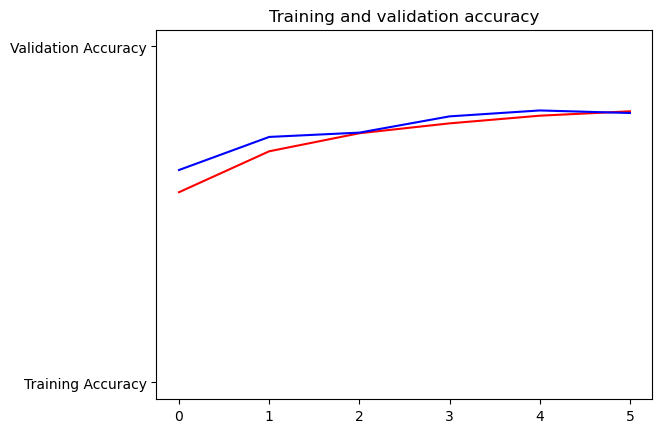

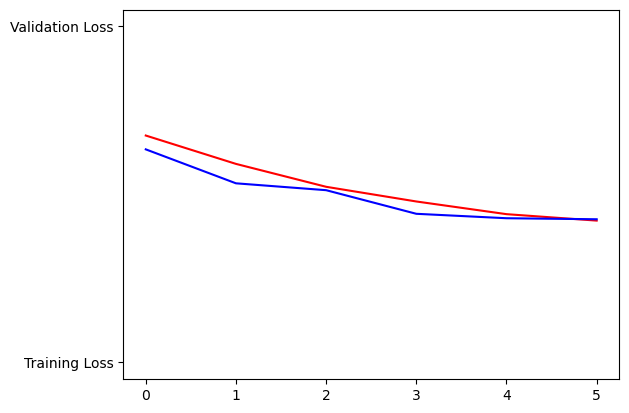

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [31]:
def download_history():
  import pickle
  
  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

download_history()